# Exercise 2

In [1]:
# Importing libs
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## 1.1 Write a program which increases the brightness of an image and paint black vertical strips on it.  

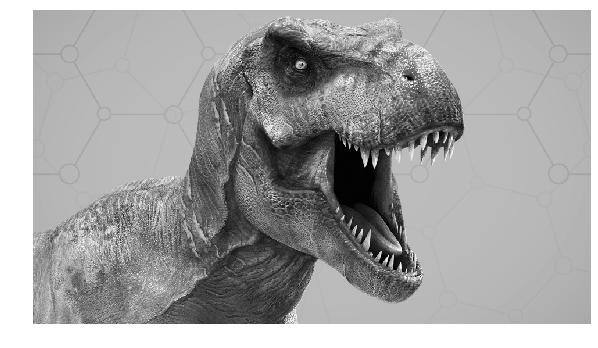

In [10]:
t_rex = cv2.imread('images/t_rex.jpg', 0)

plt.figure(figsize=(10, 10))
plt.imshow(t_rex, cmap='gray')
plt.axis('off')
plt.show()

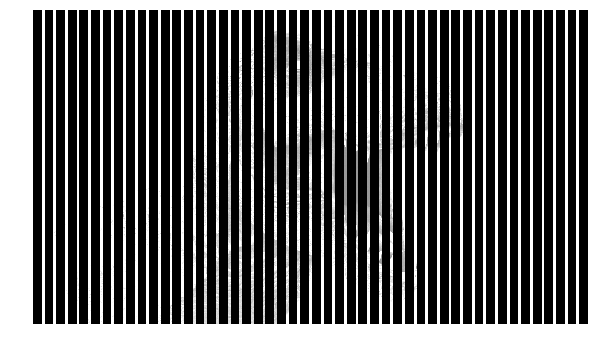

True

In [47]:
# Increase the pixel intensity by a value v
def addWeight(img, v):
    copy = img.astype(int)
    copy += v
    copy[ copy > 255 ] = 255
    return copy

# Draw vertical rectangle
def vertical_rectangle(img, p, width, color):
    img[:,p:p+width] = color

# Draw several vertical rectangles
def vertical_strips(img, width, spacing, color):
    copy = img.copy()
    h,w = copy.shape
    sw = 0
    while(sw < w):
        vertical_rectangle(copy, sw, width, color)
        sw += width + spacing
    return copy

# Apply weight and draw vertical rectangles
def efect(img, weight, width, spacing, color):
    weighted = addWeight(img, weight)
    return vertical_strips(weighted, width, spacing, color)

t_rex2 = efect(t_rex, 150, 15, 5, 0)

plt.figure(figsize=(10, 10))
plt.imshow(t_rex2, cmap='gray')
plt.axis('off')
plt.show()

cv2.imwrite('images/stripes_result.jpg', t_rex2)

## 1.2 Write a program that smooths the above image to looks like the original image.

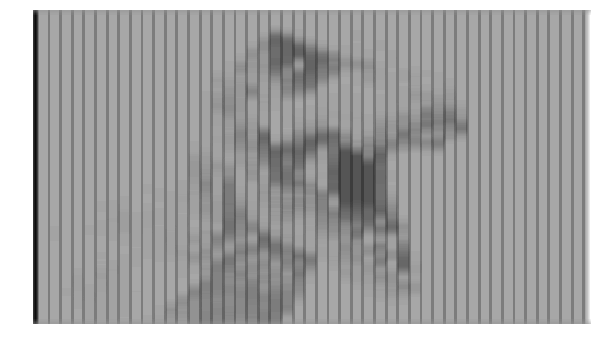

True

In [82]:
def blur(img, size):
    copy = img.astype(int)
    h,w = copy.shape
    
    surrounded = copy.mean() * np.ones((h + 2*(size//2), w + 2*(size//2)), dtype=int)
    surrounded[size//2:h + size//2, size//2:w + size//2] = copy
    
    for row in range(h):
        for col in range(w):
            copy[row,col] = np.sum(surrounded[row : row + size, col: col+size]) // (size*size)
    
    return copy
    
blured = blur(t_rex2, 19)

plt.figure(figsize=(10, 10))
plt.imshow(blured, cmap='gray')
plt.axis('off')
plt.show()

cv2.imwrite('images/blur_result.jpg', blured)